<a href="https://colab.research.google.com/github/devs-shubham/Time-Series-Analysis-Projects/blob/main/AI_financial_market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [232]:
df = pd.read_csv("/content/ai_financial_market_daily_realistic_synthetic.csv")
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [234]:
df["Date"] = pd.to_datetime(df["Date"])      # changing in data data types

In [235]:
df.dtypes

,0
Date,datetime64[ns]
Company,object
R&D_Spending_USD_Mn,float64
AI_Revenue_USD_Mn,float64
AI_Revenue_Growth_%,float64
Event,object
Stock_Impact_%,float64


In [236]:
df['Company'].unique()
# df['Company'].nunique()
# df['Company'].value_counts()



array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [237]:
# create a New Columns for Year Only
df['Year'] = df['Date'].dt.year
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


In [238]:
# checking for null values
df.isnull().sum()

,0
Date,0
Company,0
R&D_Spending_USD_Mn,0
AI_Revenue_USD_Mn,0
AI_Revenue_Growth_%,0
Event,10726
Stock_Impact_%,0
Year,0


# How Much amount Companies spend on R & D ?   

In [239]:
df.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [240]:

RD = df.groupby("Company")["R&D_Spending_USD_Mn"].sum()/1000               # billions
RD

,R&D_Spending_USD_Mn
Company,
Google,423.34114
Meta,264.53307
OpenAI,26.48277


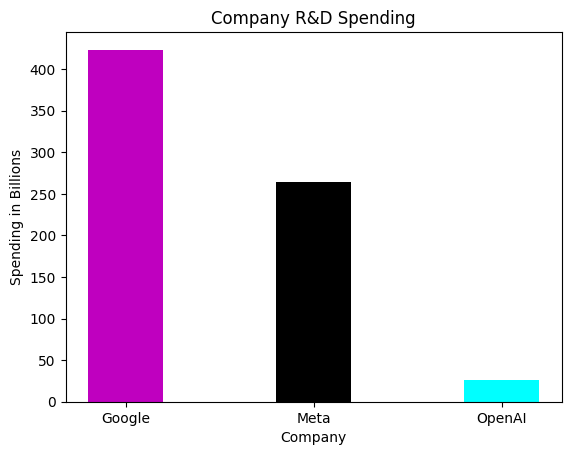

In [241]:
# plotting Bar Graph

plt.bar(RD.index, RD.values , color = ["m", "Black", "cyan"] , width=0.4 )
plt.title("Company R&D Spending")
plt.xlabel("Company")
plt.ylabel("Spending in Billions")
plt.show()

# Revenue Earned By Company

In [242]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [243]:
rev = df.groupby("Company")["AI_Revenue_USD_Mn"].sum()/1000
rev

,AI_Revenue_USD_Mn
Company,
Google,284.49838
Meta,189.62182
OpenAI,9.46289


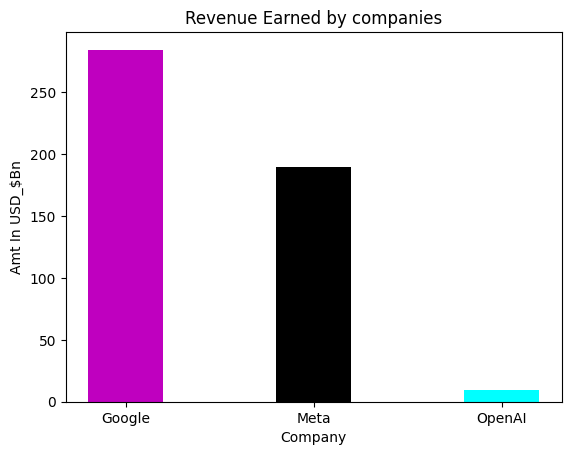

In [244]:
# plot graph
plt.bar(rev.index, rev.values ,  color = ["m", "Black", "cyan"] , width=0.4)
plt.title("Revenue Earned by companies" )
plt.xlabel("Company")
plt.ylabel("Amt In USD_$Bn")
plt.show()

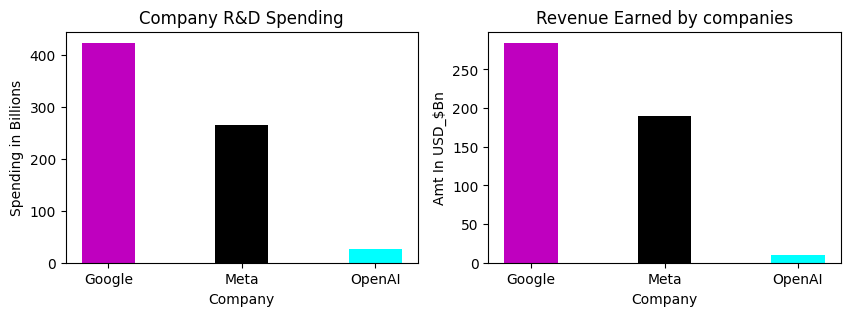

In [245]:
# bar plot to show the expenditure and revenue of the companies
plt.figure( figsize=(10,3))

plt.subplot(1,2,1)

plt.bar(RD.index, RD.values , color = ["m", "Black", "cyan"] , width=0.4 )

plt.title("Company R&D Spending")
plt.xlabel("Company")
plt.ylabel("Spending in Billions")


plt.subplot(1,2,2)

plt.bar(rev.index, rev.values ,  color = ["m", "Black", "cyan"] , width=0.4)

plt.title("Revenue Earned by companies" )
plt.xlabel("Company")
plt.ylabel("Amt In USD_$Bn")

plt.show()

# Date wise impact on the Stock

In [246]:
df.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [247]:
df.groupby("Date")["Stock_Impact_%"].sum()

,Stock_Impact_%
Date,
2015-01-01,-0.80
2015-01-02,0.06
2015-01-03,1.74
2015-01-04,0.26
2015-01-05,-1.24
...,...
2024-12-27,-0.19
2024-12-28,-1.30
2024-12-29,0.67


Text(0, 0.5, 'Stock_Impact%')

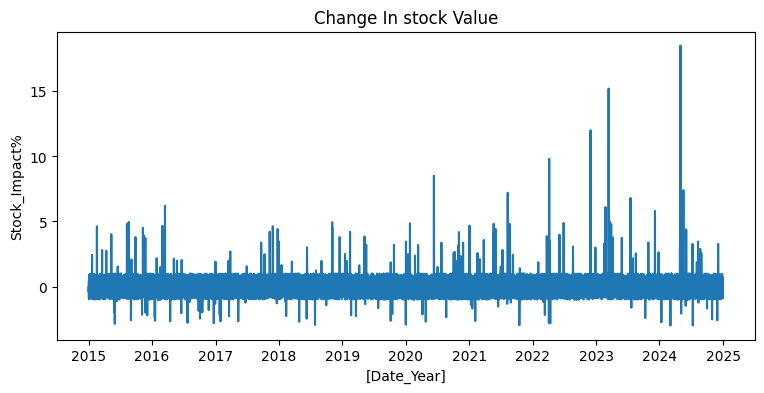

In [248]:
plt.figure(figsize=(9,4))
plt.plot(df["Date"] , df["Stock_Impact_%"]);
plt.title("Change In stock Value")
plt.xlabel("[Date_Year]")
plt.ylabel("Stock_Impact%")

# create 3 sepetare dataframes for company

In [249]:
df["Company"].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [250]:
Data_OpenAI = df[df["Company"] == "OpenAI"]


In [251]:
Data_Google = df[df["Company"] == "Google"]

In [252]:
Data_Meta = df[df["Company"] == "Meta"]

In [253]:
Data_OpenAI

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


Text(0, 0.5, 'Stock_Impact%')

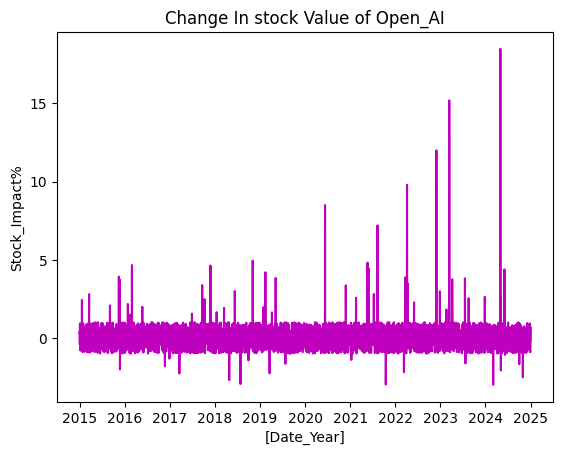

In [254]:
# Bar graph for Open_AI Date wise impact on the Stock
plt.plot(Data_OpenAI["Date"] ,Data_OpenAI["Stock_Impact_%"] , color = "m");
plt.title("Change In stock Value of Open_AI")
plt.xlabel("[Date_Year]")
plt.ylabel("Stock_Impact%")

In [255]:
Data_Google

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,NaN,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,NaN,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,NaN,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,NaN,-0.17,2024


Text(0, 0.5, 'Stock_Impact%')

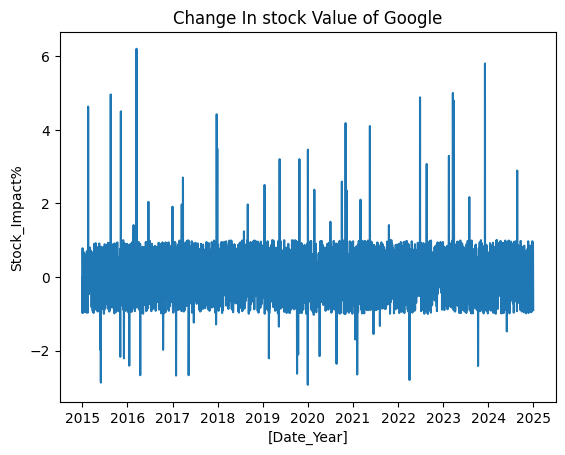

In [256]:
# Bar graph for Google Date wise impact on the Stock
plt.plot(Data_Google["Date"] ,Data_Google["Stock_Impact_%"] );
plt.title("Change In stock Value of Google")
plt.xlabel("[Date_Year]")
plt.ylabel("Stock_Impact%")

In [257]:
Data_Meta

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


Text(0, 0.5, 'Stock_Impact%')

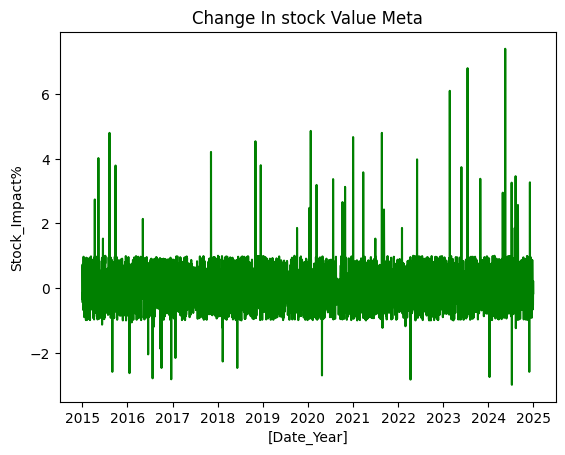

In [258]:
# Bar graph for meta Date wise impact on the Stock
plt.plot(Data_Meta["Date"] ,Data_Meta["Stock_Impact_%"] , color= "g");
plt.title("Change In stock Value Meta")
plt.xlabel("[Date_Year]")
plt.ylabel("Stock_Impact%")

# Events When Stocks Impact Was Observed

In [259]:
# openAI's Events When Stocks Impact Was Observed

Data_OpenAI.sort_values( by= "Stock_Impact_%" ,ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [260]:
# Google Events When Stocks Impact Was Observed

Data_Google.sort_values( by= "Stock_Impact_%" ,ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [261]:
# Meta Events When Stocks Impact Was Observed

Data_Meta.sort_values( by= "Stock_Impact_%" ,ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
7526,2015-08-09,Meta,48.97,19.95,-0.27,AI Video Recommendation upgrade,4.80,2015
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


# AI Revenue Growth Of The Companies

In [262]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


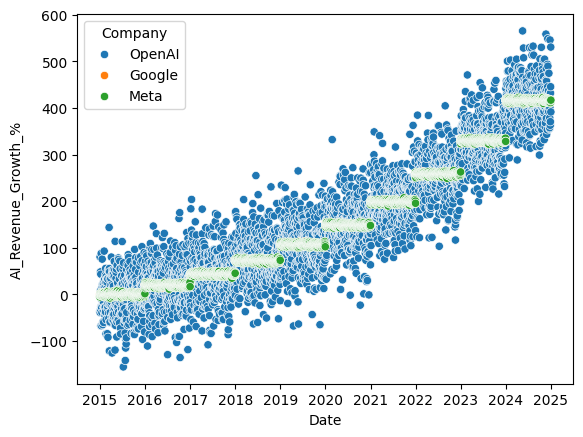

In [263]:
# Scatter Plot
sns.scatterplot(x = "Date", y="AI_Revenue_Growth_%" , data=df, hue="Company");
plt.show()


In [264]:
df.sort_values( by = ["AI_Revenue_Growth_%"])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,NaN,0.70,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024


# seperate analysis of compnay

open ai revenue growth year by year

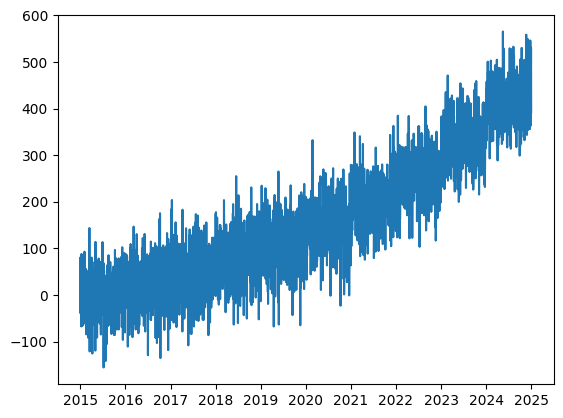

In [265]:
plt.plot( Data_OpenAI['Date'] , Data_OpenAI['AI_Revenue_Growth_%'] )
plt.show()

Google revenue growth year by year

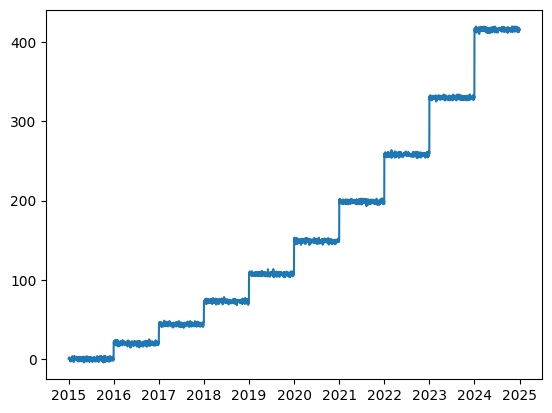

In [266]:
plt.plot( Data_Google['Date'] , Data_Google['AI_Revenue_Growth_%'] )
plt.show()

Meta revenue growth year by year

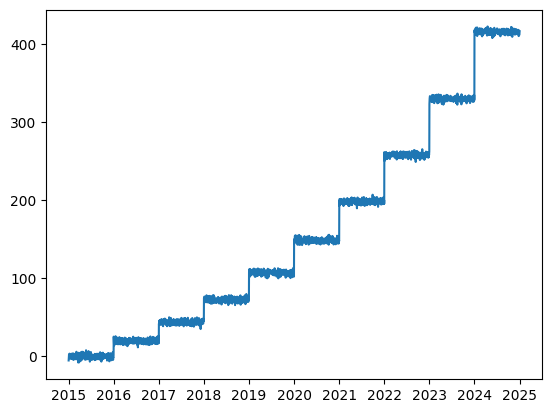

In [267]:
plt.plot( Data_Meta['Date'] , Data_Meta['AI_Revenue_Growth_%'] )
plt.show()

# Corelation between the columns

In [268]:
df.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525
Year,0.297701,0.526478,0.952199,0.016525,1.000000


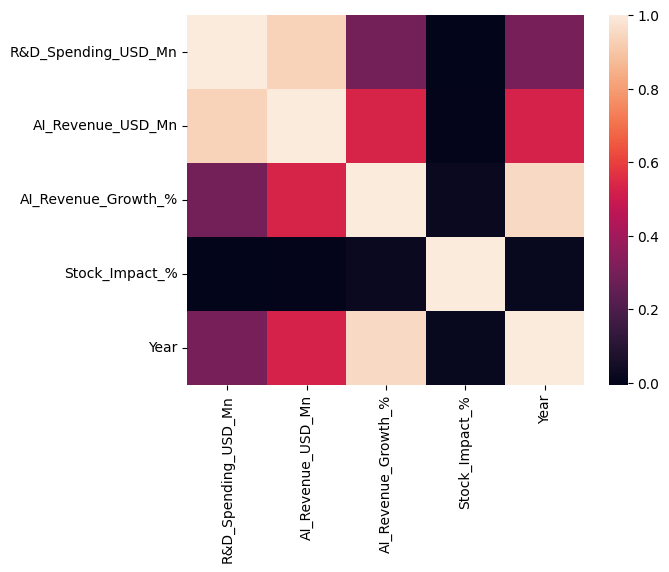

In [269]:
# Heat map
sns.heatmap( df.corr(numeric_only=True) );

# Expenditure VS Revenue Year-by-Year

In [270]:
df.head(4)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015


In [271]:
spend = df.groupby("Year")["R&D_Spending_USD_Mn"].sum()
spend

,R&D_Spending_USD_Mn
Year,
2015,49304.23
2016,53349.94
2017,57475.12
2018,62002.16
2019,67071.51
2020,72602.53
2021,78207.32
2022,84390.17
2023,91193.92


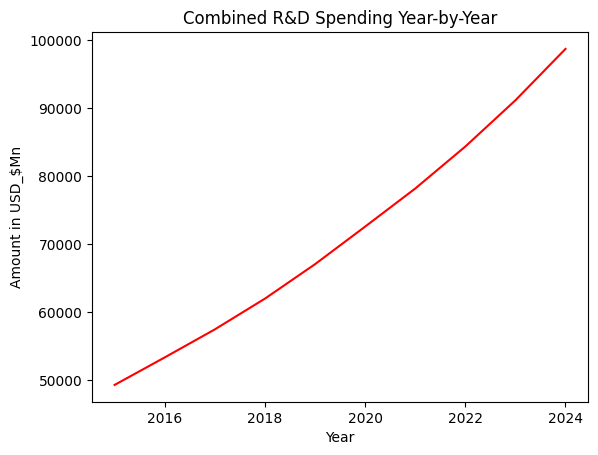

In [272]:
# showing the amount spent on R & D

plt.plot(spend.index, spend.values , color = "red");
plt.title("Combined R&D Spending Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.show()

In [273]:
revenue = df.groupby("Year")["AI_Revenue_USD_Mn"].sum()
revenue

,AI_Revenue_USD_Mn
Year,
2015,18623.21
2016,22361.20
2017,26776.80
2018,32164.44
2019,38580.32
2020,46456.19
2021,55591.14
2022,66674.24
2023,80041.64


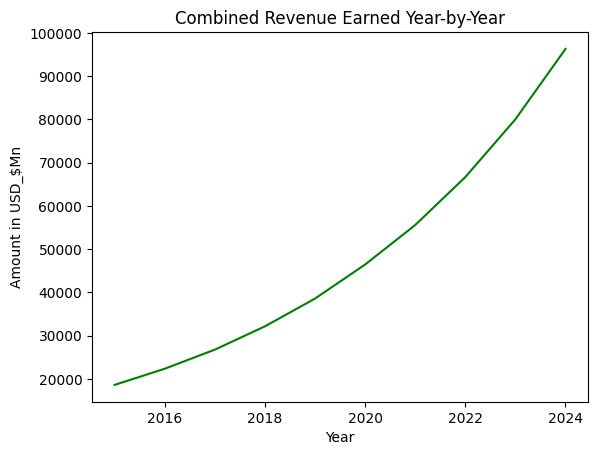

In [274]:
revenue = df.groupby("Year")["AI_Revenue_USD_Mn"].sum()
# showing the revenue earned

plt.plot(revenue.index, revenue.values , color = "green");
plt.title("Combined Revenue Earned Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.show()

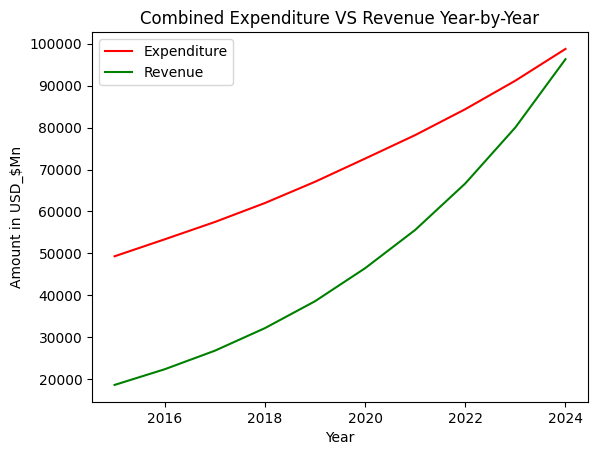

In [275]:
plt.plot(spend.index, spend.values , color = "red");
plt.plot(revenue.index, revenue.values , color = "green");
plt.title("Combined Expenditure VS Revenue Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.legend(["Expenditure","Revenue"])
plt.show()

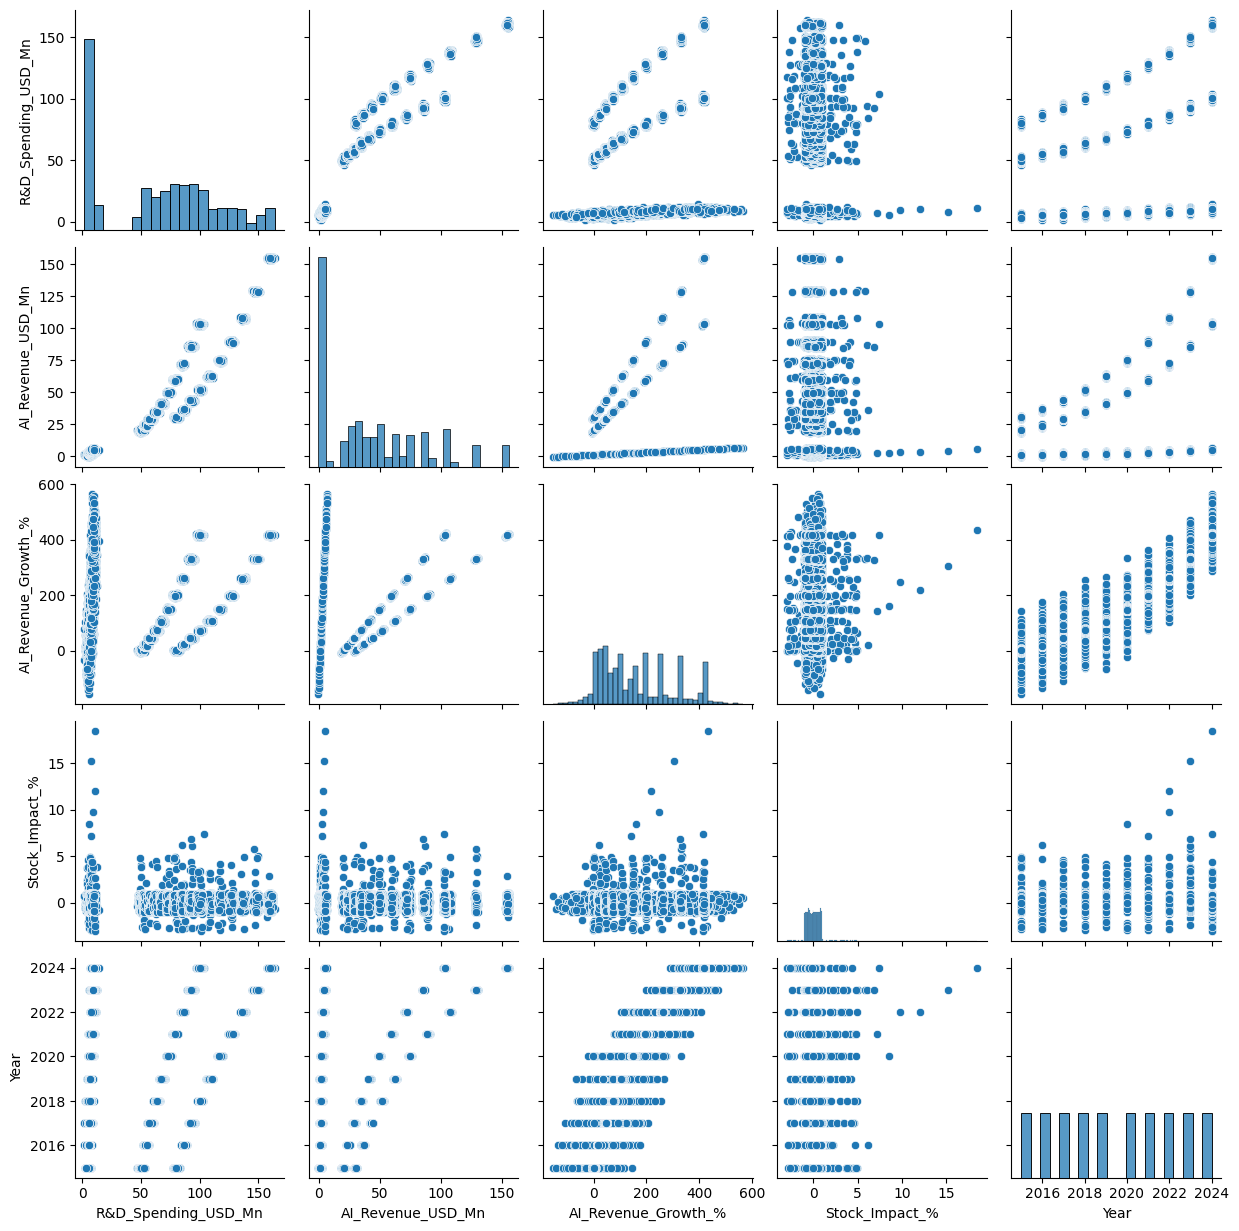

In [276]:
# pair plot to show the Relations btw the columns
sns.pairplot(df);

# Event Impact Analysis

In [277]:
df["Event"].value_counts()

,count
Event,
AI speech recognition release,37
AI Ads Optimization upgrade,32
AI partnership deal,32
AI-powered search update,32
AI Video Recommendation upgrade,29
AI ethics policy update,27
Cloud AI launch,27
GPT-1 release,1
GPT-2 release,1


In [278]:
## checking for particular events
df[df["Event"] == "AI Video Recommendation upgrade"]

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
508,2016-05-23,OpenAI,4.45,1.11,11.19,AI Video Recommendation upgrade,1.99,2016
661,2016-10-23,OpenAI,5.00,1.42,42.10,AI Video Recommendation upgrade,-0.06,2016
1023,2017-10-20,OpenAI,4.92,1.28,27.66,AI Video Recommendation upgrade,-0.38,2017
1431,2018-12-02,OpenAI,5.72,1.39,39.07,AI Video Recommendation upgrade,0.47,2018
2239,2021-02-17,OpenAI,9.35,2.70,170.22,AI Video Recommendation upgrade,2.57,2021
2627,2022-03-12,OpenAI,8.72,3.49,248.50,AI Video Recommendation upgrade,-2.19,2022
2971,2023-02-19,OpenAI,11.73,4.62,362.35,AI Video Recommendation upgrade,1.82,2023
3125,2023-07-23,OpenAI,8.52,3.82,281.89,AI Video Recommendation upgrade,-1.63,2023
3585,2024-10-25,OpenAI,10.24,5.84,483.65,AI Video Recommendation upgrade,-0.75,2024
4033,2016-01-16,Google,85.60,36.12,20.41,AI Video Recommendation upgrade,-2.41,2016


In [279]:
df[df["Event"] == "TensorFlow open-source release"]

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,2015


In [280]:
# showing impact before and after the 10 days
tf = df.loc[3955: 3975]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43,2015
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,2015
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72,2015
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61,2015


Text(0, 0.5, 'Stock_Impact_%')

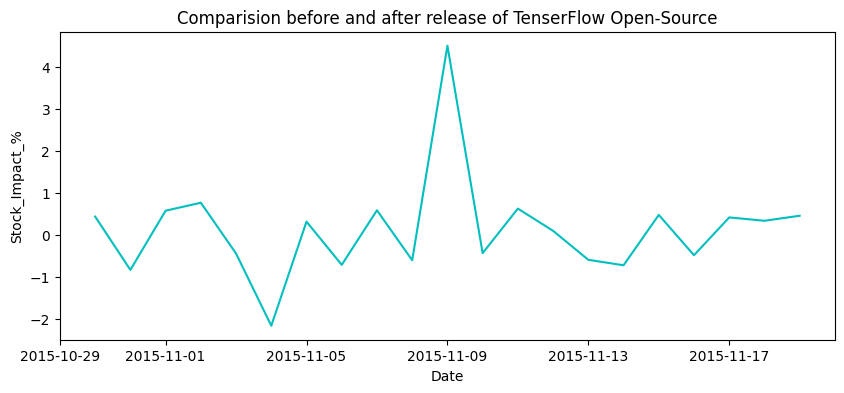

In [281]:
# showing the impacts with the line Charts
plt.figure(figsize=(10,4))

plt.plot(tf["Date"] ,tf["Stock_Impact_%"] , color = 'c');
plt.title("Comparision before and after release of TenserFlow Open-Source")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

In [282]:
df.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [283]:
# Daily average impact on the stocks of the companies
df.groupby("Company")['Stock_Impact_%'].mean()*100

,Stock_Impact_%
Company,
Google,2.620860
Meta,0.976184
OpenAI,4.070901


In [284]:
# Daily average Expenditure on R $ D by the Companies
df.groupby("Company")['R&D_Spending_USD_Mn'].mean()*100

,R&D_Spending_USD_Mn
Company,
Google,11588.862305
Meta,7241.529428
OpenAI,724.959485


In [285]:
# Maximum impact on a company's Stocks
df.groupby("Company")['Stock_Impact_%'].max()

,Stock_Impact_%
Company,
Google,6.2
Meta,7.4
OpenAI,18.5


# change in the index wrt Year & Company

In [286]:
# Highest change in the index
stocks = df.groupby(["Year","Company"])['Stock_Impact_%'].max()
stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

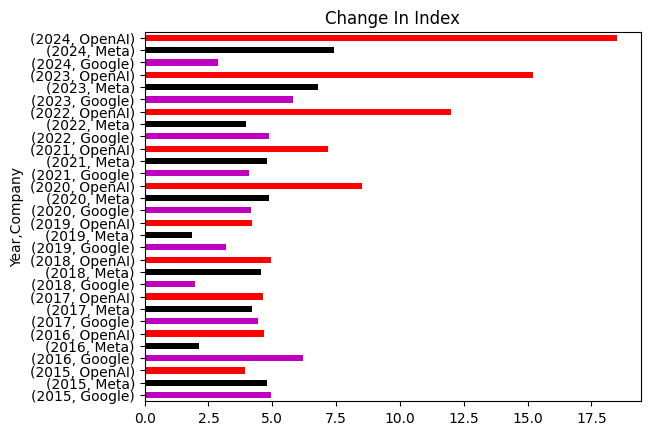

In [287]:
stocks.plot(kind = "barh", color= ['m', "black", 'r']);
plt.title("Change In Index")
plt.show()